<a href="https://colab.research.google.com/github/JackNKong/main/blob/main/3_multi_classfi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.MNIST(root="data", train=True, download=True, 
transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True,
transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



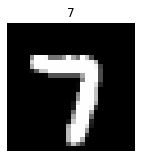

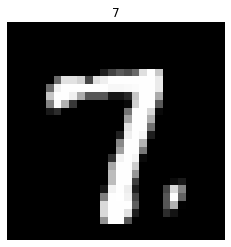

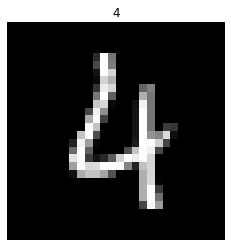

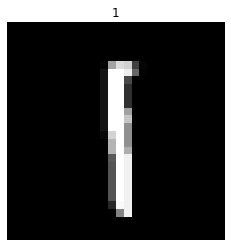

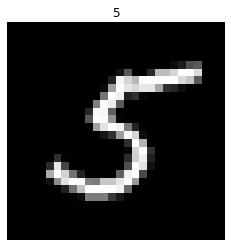

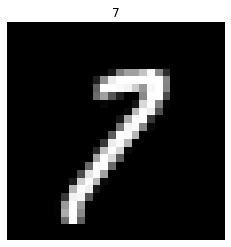

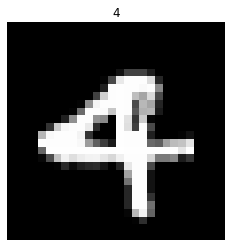

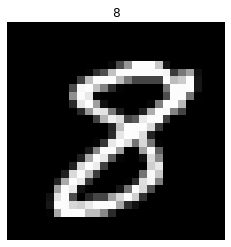

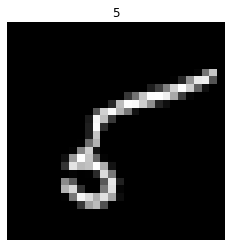

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
device = torch.device("cuda:0")

In [6]:
raining_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

In [7]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=training_data, batch_size=64, shuffle=True)

In [8]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        self.relu =nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


In [9]:
net = Net().to(device)

In [10]:
loss_fuction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


In [14]:
for epoch in range(20):
  loss_val = 0
  for itr, data in enumerate(train_loader):
    optimizer.zero_grad()
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)
    pred = net(inputs)
    loss = loss_fuction(pred, labels)
    loss.backward()
    optimizer.step()
    loss_val += loss.item()
    print("Loss: ", loss_val)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Loss:  5.355505369015191
Loss:  5.356202507326998
Loss:  5.373770115832485
Loss:  5.400231288681425
Loss:  5.400308501667496
Loss:  5.405992084874924
Loss:  5.426166793092307
Loss:  5.429088048630547
Loss:  5.432515048881214
Loss:  5.435494692989778
Loss:  5.45236076972742
Loss:  5.453197333198659
Loss:  5.472121407446139
Loss:  5.479001835156851
Loss:  5.479381321923029
Loss:  5.479398523734744
Loss:  5.479464368786466
Loss:  5.508428495269072
Loss:  5.5149189600570026
Loss:  5.519917780890864
Loss:  5.535586046412391
Loss:  5.546908585712117
Loss:  5.549081178273809
Loss:  5.55261290877479
Loss:  5.552619680777752
Loss:  5.561588810772264
Loss:  5.580658242121899
Loss:  5.580841616233556
Loss:  5.606959967380135
Loss:  5.612354365149258
Loss:  5.612979129045016
Loss:  5.616600795038721
Loss:  5.617387123086701
Loss:  5.617438210895671
Loss:  5.640425479760779
Loss:  5.643620186042426
Loss:  5.6454228931334
Loss:  5.645702835660813
Loss:  5.65507578

In [16]:
input_test = test_data.data.float().to(device)
pred_test = net(input_test)
pred_category = torch.argmax(pred_test, dim=1)
label_test = test_data.targets.to(device)
accu = torch.mean((pred_category == label_test).float())
print("Test accuracy:", accu)

Test accuracy: tensor(0.9767, device='cuda:0')
